In [ ]:
##Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import tree

## Problem 1:

In [ ]:
## load the dataset as dataframe
X,y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(y.value_counts())

1    357
0    212
Name: target, dtype: int64


In [ ]:
## train test split with 80:20 ratio and along with stratify based on the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)

In [ ]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (455, 30)
X_test shape : (114, 30)
y_train shape : (455,)
y_test shape : (114,)


In [ ]:
## setting the hyper parameters
depth_vals = [2, 4, 6, 8, 10]
leaf_vals = [5, 10, 15, 20]
criterion_vals = ['gini', 'entropy']

In [ ]:
##iterating through the list of hyper parameters as a grid search
## of all possible combinations
result_table = []
max_accuracy=0
best_hypers = {}

for depth in depth_vals:
  for leaf in leaf_vals:
    for criterion in criterion_vals:
      classifier = DecisionTreeClassifier(
          max_depth=depth, min_samples_leaf=leaf, criterion=criterion
      )
      ## train the model with the hyperparam to the train data
      classifier.fit(X_train, y_train)

      ## evaluating model performances
      accuracy = classifier.score(X_test, y_test)
      result_table.append([depth, leaf, criterion, accuracy])

      ## checking for the maximum accuracry and obtaining the hyper parameters of the same
      if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_hypers={
            'max_depth':depth,
            'min_samples_leaf':leaf,
            'criterion':criterion
        }


# Define the table headers
headers = ["max_depth", "min_samples_leaf", "criterion", "Test Accuracy"]

# Print the result table
print(tabulate(result_table, headers=headers, tablefmt="fancy_grid"))
print('max_accuracy :', max_accuracy)
print('best_hypers : ', best_hypers)

╒═════════════╤════════════════════╤═════════════╤═════════════════╕
│   max_depth │   min_samples_leaf │ criterion   │   Test Accuracy │
╞═════════════╪════════════════════╪═════════════╪═════════════════╡
│           2 │                  5 │ gini        │        0.921053 │
├─────────────┼────────────────────┼─────────────┼─────────────────┤
│           2 │                  5 │ entropy     │        0.885965 │
├─────────────┼────────────────────┼─────────────┼─────────────────┤
│           2 │                 10 │ gini        │        0.921053 │
├─────────────┼────────────────────┼─────────────┼─────────────────┤
│           2 │                 10 │ entropy     │        0.885965 │
├─────────────┼────────────────────┼─────────────┼─────────────────┤
│           2 │                 15 │ gini        │        0.921053 │
├─────────────┼────────────────────┼─────────────┼─────────────────┤
│           2 │                 15 │ entropy     │        0.885965 │
├─────────────┼───────────────────

The maximum accuracy of 92% occurs with max_depth as 4, minimum sample leaf as 5 and criterion as Entropy. However, while scanned for other values, **it looks like just with max_depth as 2, min_samples_leaf as 5 and gini gives an accuracy much closer to the max one found, the same 92%**. So it is subjective to the resources available and other parameters infleuencing the test case. But for this test, the maximum accuracy is obtained with the hyper parameter values best_hypers :  **'max_depth': 4, 'min_samples_leaf': 5, 'criterion': 'entropy' **

## Fitting the model with optimal hyper parameter plotting the tree

[Text(0.625, 0.9, 'x[22] <= 115.35\nentropy = 0.953\nsamples = 100.0%\nvalue = [0.374, 0.626]'),
 Text(0.39285714285714285, 0.7, 'x[27] <= 0.111\nentropy = 0.474\nsamples = 69.2%\nvalue = [0.102, 0.898]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 21.86\nentropy = 0.068\nsamples = 54.1%\nvalue = [0.008, 0.992]'),
 Text(0.07142857142857142, 0.3, 'entropy = 0.0\nsamples = 46.8%\nvalue = [0.0, 1.0]'),
 Text(0.21428571428571427, 0.3, 'x[24] <= 0.13\nentropy = 0.33\nsamples = 7.3%\nvalue = [0.061, 0.939]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.0\nsamples = 6.2%\nvalue = [0.0, 1.0]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.971\nsamples = 1.1%\nvalue = [0.4, 0.6]'),
 Text(0.6428571428571429, 0.5, 'x[21] <= 27.475\nentropy = 0.988\nsamples = 15.2%\nvalue = [0.435, 0.565]'),
 Text(0.5, 0.3, 'x[27] <= 0.163\nentropy = 0.65\nsamples = 9.2%\nvalue = [0.167, 0.833]'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.316\nsamples = 7.7%\nvalue = [0.057, 0.943]'),
 Text(0.5714285714285714, 0.

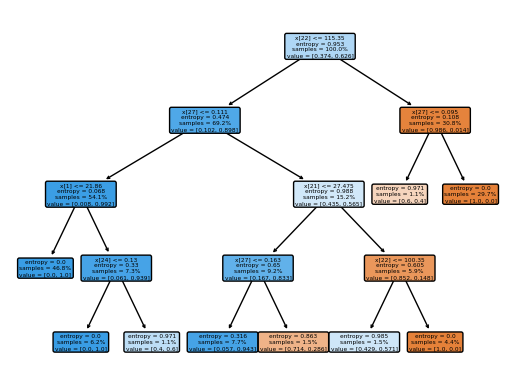

In [ ]:
classifier = DecisionTreeClassifier(
          max_depth=4, min_samples_leaf=5, criterion='entropy'
      )
## train the model with the hyperparam to the train data
classifier.fit(X_train, y_train)
##printing the tree
tree.plot_tree(classifier,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True)


## Problem 2 (Coding) (3*3 = 9 pts): Post-Pruning using Cost Complexity analysis Use the same dataset with same stratified train test split as you used in the first problem.
## 1. Build the Decision Tree classifier. Find the cost complexity pruning path, cost complexity parameters (ccp_alphas), and path impurities. Plot total impurity of nodes vs. effective alpha. Now, explain the plot.


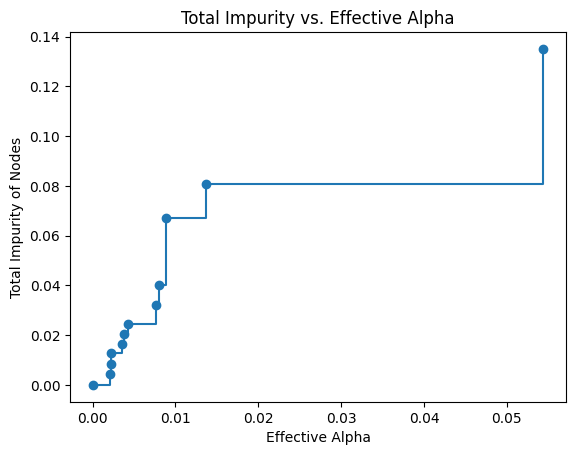

In [ ]:
## train the DT model with the same training data
clf = DecisionTreeClassifier(random_state=2023)
# clf.fit(X_train, y_train)

## Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

## Plot total impurity of nodes vs. effective alpha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Nodes")
ax.set_title("Total Impurity vs. Effective Alpha")
plt.show()

## Explanation: The plot above shows that as the effective alpha increases, the total number of impure nodes also increases. As the effective alpha which is the complexity parameter for pruning the decision tree increases, the tree becomes more and more pruned which means more nodes are pruned from the decision tree. Thus as the effecive alpha increases, the model becomes simpler as the number of nodes being pruned is high and hence increases the impurity in nodes. The plot helps us to understand the right balance between accuracy and model complexity. At the point where the impurity is flat even though the alpha increases would be the ideal point in general.

## 2. Plot and explain: number of nodes vs alpha & depth of tree vs. alpha


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33302365522145744


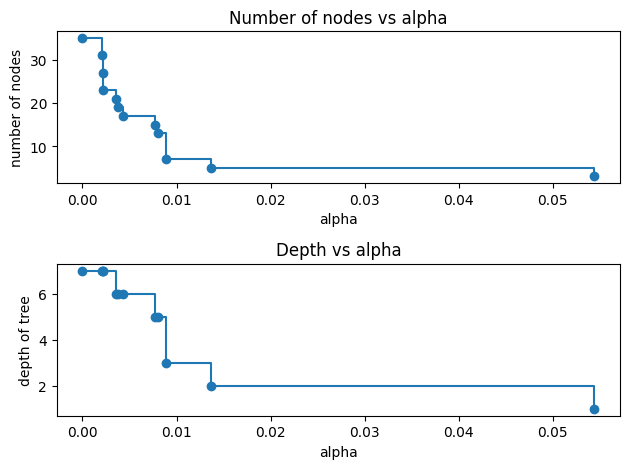

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## **Explanation** -  In the first plot, as the alpha value increases, the number of nodes of the tree decreases because more number of nodes are pruned. This shows that the model becomes simple and more generalized as the alpha value increases.

## In the second plot, as the alpha value increases, the depth of tree which is the length of the longest path from root to leaf node decreases. This also indicates that the model is becoming generalized with fewer complex decision rules.

##Both plots help visualize the effect of pruning on the complexity of the decision tree. Higher values of alpha lead to more aggressive pruning, resulting in simpler and less deep trees. These plots can assist in determining the optimal value of alpha, striking a balance between model complexity and predictive performance.

## 3. Plot and explain: Accuracy vs. alpha for training and testing sets. Mention the best ccp_alpha value for this analysis and why.

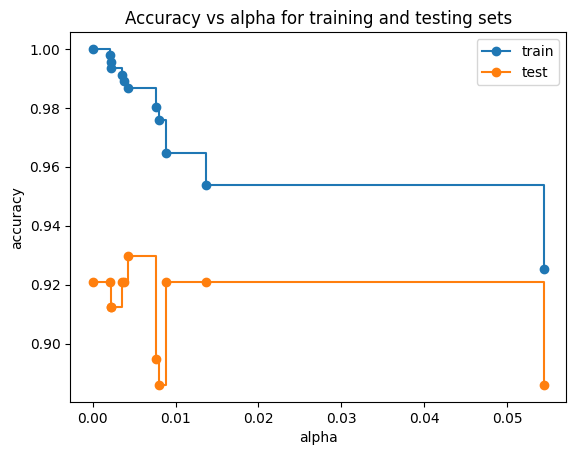

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Explanation - As the alpha value starts from 0, the model was overfitting with 100% training accuracy and around 92% testing accuracy. However, as alpha increases and as the pruning of nodes increases, the testing accuracy has its highest point at alpha around 0.005 and then flats out beyond 0.01 until drops to lowest. Hence we can consider the best value of ccp_alpha as 0.005 where the testing accuracy is at the maximum with 93% and training accuracy more than 98%.